In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic_train= pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test= pd.read_csv('/kaggle/input/titanic/test.csv')
titanic_gender= pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
survived_women= titanic_train.loc[titanic_train['Sex']=='female']['Survived']
# np.array(survived_women)

In [7]:
survived_men =titanic_train.loc[titanic_train['Sex']=='male']['Survived']

In [8]:
%time
print('The percentage of survived women is ', round(sum((survived_women)/len(survived_women)*100),2),'%')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
The percentage of survived women is  74.2 %


In [9]:
%%time
survived_women.sum()/survived_women.count()

CPU times: user 237 µs, sys: 26 µs, total: 263 µs
Wall time: 270 µs


0.7420382165605095

In [10]:
%time
print('The percentage of survived women is ', round(sum((survived_women)/len(survived_women)*100),2),'%')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs
The percentage of survived women is  74.2 %


In [11]:
%time
print('The percentage of survived men is ', round(sum((survived_men)/len(survived_men)*100),2),'%')

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.82 µs
The percentage of survived men is  18.89 %


In [12]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


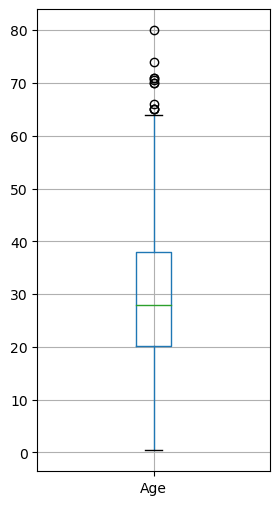

In [13]:
titanic_train.boxplot(column='Age',figsize=(3,6))
plt.show()

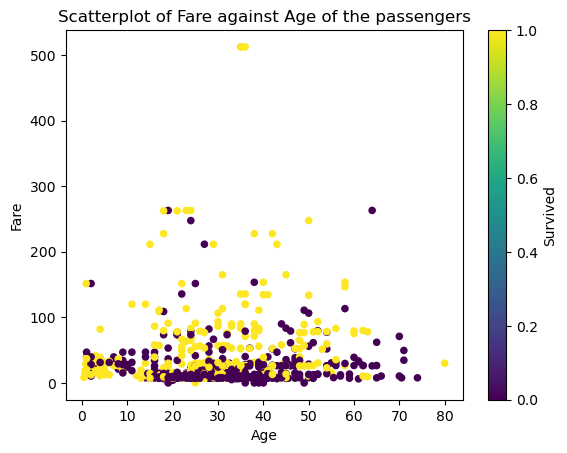

In [14]:
titanic_train.plot.scatter(x='Age',y='Fare',c='Survived',colormap='viridis')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.title('Scatterplot of Fare against Age of the passengers')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [16]:
y_Survived=titanic_train['Survived']
features=['Pclass','Parch','Sex','SibSp']
y_train=pd.get_dummies(titanic_train[features])
X_test=pd.get_dummies(titanic_test[features])

In [17]:
model=RFC(n_estimators=100,random_state=1,max_depth=5)

In [18]:
model.fit(y_train,y_Survived)

RandomForestClassifier(max_depth=5, random_state=1)

In [19]:
result=model.predict(X_test)
outcome=pd.DataFrame({"Id":titanic_test.PassengerId,'Survived':result})

In [20]:
outcome.to_csv('submission.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
